In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [5]:
dtrain = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')
D=pd.read_csv('gender_submission.csv')

In [6]:
Xtrain = pd.DataFrame(dtrain, columns=['Pclass','Sex', 'Age', 'SibSp', 'Parch','Embarked'])
ytrain = dtrain['Survived']

Xtest = pd.DataFrame(dtest, columns=['Pclass','Sex', 'Age', 'SibSp', 'Parch','Embarked'])
ytest= D['Survived']

In [7]:
Xtrain['Age'].fillna(Xtrain['Age'].mean(), inplace=True)
Xtrain = pd.get_dummies(Xtrain, columns=['Sex'], drop_first=True)
Xtrain = pd.get_dummies(Xtrain, columns=['Embarked'], drop_first=True)
Xtest['Age'].fillna(Xtest['Age'].mean(), inplace=True)
Xtest = pd.get_dummies(Xtest, columns=['Sex'], drop_first=True)
Xtest = pd.get_dummies(Xtest, columns=['Embarked'], drop_first=True)

In [8]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [9]:
model = LogisticRegression(random_state=42)
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

In [10]:
print('Accuracy', accuracy_score(ytest, ypred))

Accuracy 0.9425837320574163


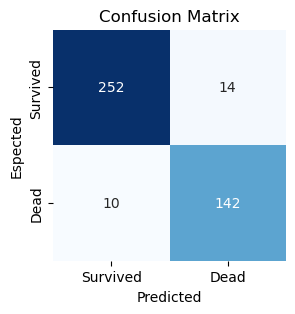

In [11]:
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, 
            fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Survived','Dead'], yticklabels=['Survived','Dead'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Espected')
plt.show()

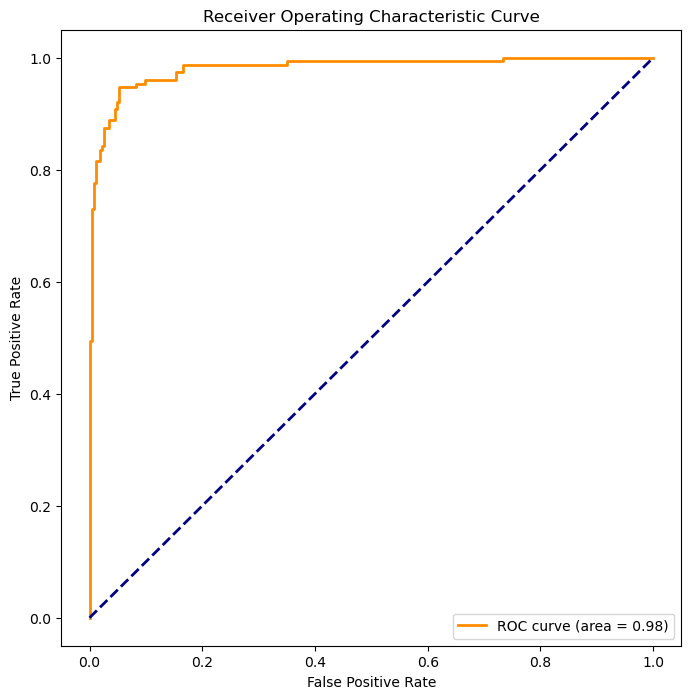

In [12]:
y_pred_prob = model.predict_proba(Xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

NameError: name 'model' is not defined